In [1]:
import malaya_speech
import librosa
import numpy as np

In [2]:
y, sr = malaya_speech.utils.read.wav('speech/example.wav')
len(y), sr

(200160, 16000)

In [3]:
vad = malaya_speech.vad.webrtc(minimum_amplitude = int(np.quantile(np.abs(y), 0.2)))

In [4]:
frames = list(malaya_speech.utils.generator.frames(30, y, sr))
frames = [(frame, vad(frame, sr)) for frame in frames]

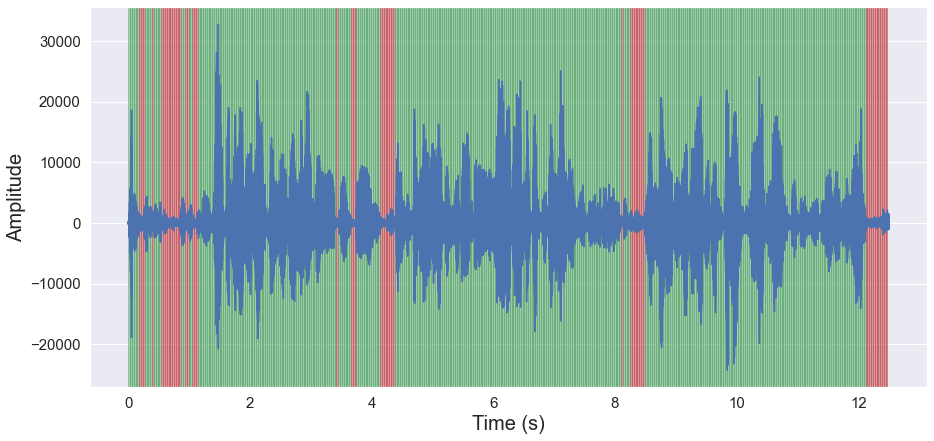

In [5]:
malaya_speech.extra.visualization.visualize_vad(y, frames, sr)

In [6]:
%%time

grouped = malaya_speech.vad.group_vad(frames)

CPU times: user 9.06 ms, sys: 2.39 ms, total: 11.4 ms
Wall time: 11.2 ms


In [7]:
import IPython.display as ipd

ipd.Audio(grouped[np.argmax([i[0].duration for i in grouped])][0].array, rate=sr)

In [8]:
y, sr = malaya_speech.utils.read.flac('speech/7021-79759-0004.flac')
len(y), sr

(391520, 16000)

In [24]:
vad = malaya_speech.vad.webrtc(minimum_amplitude = int(np.quantile(np.abs(y), 0.2)))

In [25]:
frames = list(malaya_speech.utils.generator.frames(30, y, sr))
frames = [(frame, vad(frame, sr)) for frame in frames]

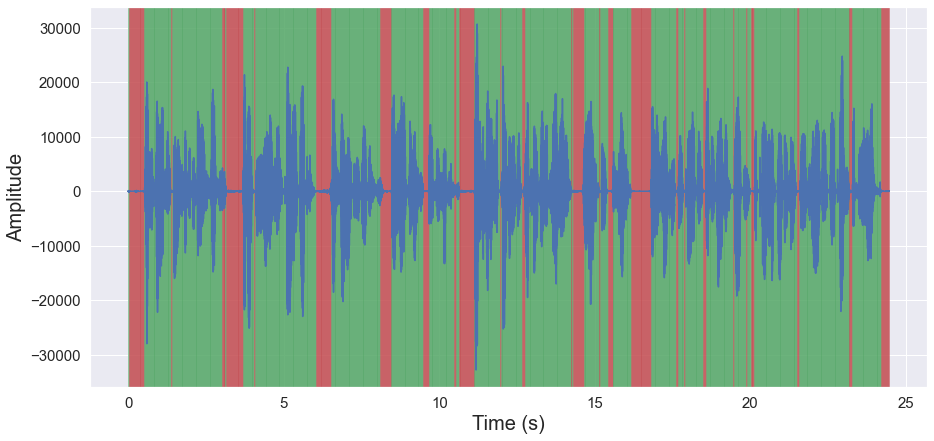

In [26]:
malaya_speech.extra.visualization.visualize_vad(y, frames, sr)

In [27]:
%%time

grouped = malaya_speech.vad.group_vad(frames)

CPU times: user 43.8 ms, sys: 7 ms, total: 50.8 ms
Wall time: 59.1 ms
